# Taller 3: Algoritmos Genéticos

Hector Camilo Clavijo Zarate hclavijo@unal.edu.co

Osmar Ediber Toloza Bernal  oetolozab@unal.edu.co

Facultad de Ingeniería

*Universidad Nacional de Colombia*

Bogotá, 2022

En este Notebook se realiza la solución a los ejercicios propuestos en el capítulo 4

## Punto 1
Estudie el MEPX, https://www.mepx.org/. Con base en una tabla histórica de 60 datos del
valor de una acción determinada o de TRM, o del índice de precios al consumidor,
encontrar una fórmula que se ajuste dicha curva usando MEPX. Con base en esa fórmula
pronostique, el valor de esa acción o índice, para los siguientes 5 días

Luego de importar 60 datos referentes la cotización de las acciones del banco Davivienda, se obtiene la función mepx,  la cual permite realizar la predicción de los valores

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import math

In [81]:
def mepx(x, outputs = None):
    prg = [0] * 50
    prg[0] = x[1]
    prg[1] = math.cos(prg[0])
    prg[2] = prg[0] - prg[1]
    prg[3] = x[1]
    prg[4] = prg[1] + prg[0]
    prg[5] = x[0]
    prg[6] = math.sqrt(prg[5])
    prg[7] = x[0]
    prg[8] = x[1]
    prg[9] = prg[6] + prg[1]
    prg[10] = x[1]
    prg[11] = prg[4] + prg[10]
    prg[12] = math.sin(prg[6])
    prg[13] = math.sin(prg[1])
    prg[14] = x[0]
    prg[15] = x[0]
    prg[16] = prg[9] - prg[4]
    prg[17] = prg[9] / prg[4]
    prg[18] = x[0]
    prg[19] = x[1]
    prg[20] = prg[12] * prg[11]
    prg[21] = x[1]
    prg[22] = prg[16] * prg[17]
    prg[23] = math.sqrt(prg[9])
    prg[24] = prg[19] / prg[8]
    prg[25] = x[1]
    prg[26] = prg[6] / prg[17]
    prg[27] = x[0]
    prg[28] = x[1]
    prg[29] = 1/prg[16]
    prg[30] = x[0]
    prg[31] = math.pow(prg[27], prg[29])
    prg[32] = x[1]
    prg[33] = prg[25] * prg[20]
    prg[34] = prg[19] + prg[27]
    prg[35] = 1/prg[23]
    prg[36] = prg[11] + prg[35]
    prg[37] = x[0]
    prg[38] = x[0]
    prg[39] = prg[22] - prg[3]
    prg[40] = prg[20] + prg[21]
    prg[41] = math.sin(prg[4])
    prg[42] = math.sin(prg[0])
    prg[43] = x[1]
    prg[44] = x[1]
    prg[45] = x[1]
    prg[46] = 1/prg[27]
    prg[47] = x[1]
    prg[48] = 1/prg[39]
    prg[49] = x[1]

    return prg[26]

También brinda una forma simplificada, la cual solo usa 8 puntos de los datos:

In [82]:
def mepx_sim(x, outputs = None):
    prg = [0] * 8
    prg[0] = x[1]
    prg[1] = math.cos(prg[0])
    prg[2] = prg[1] + prg[0]
    prg[3] = x[0]
    prg[4] = math.sqrt(prg[3])
    prg[5] = prg[4] + prg[1]
    prg[6] = prg[5] / prg[2]
    prg[7] = prg[4] / prg[6]

    return prg[7]

De la anterior se tiene la siguiente función :

$x_{8} = x_{7}+x_{6}+x_{5}+x_{4}+x_{3}+x_{2}+x_{1}+x_{0}$

Donde $x_{i}$, es el valor de $x$ en el $i$-ésimo valor de $x$, de acuerdo con la funición ***mepx_sim***, se tiene:

* $x_{7} = \frac{x_{4}}{x_{6}}$
* $x_{6} = \frac{x_{5}}{x_{2}}$
* $x_{5} = x_{4}+x_{x+1}$
* $x_{4} = \sqrt(x_{3})$
* $x_{3} = x_{0}$
* $x_{2} = x_{1} + x_{0}$
* $x_{1} = cos(x_{0})$
* $x_{0} = x_{1}$

Entonces:
$x_{8} =  \frac{x_{4}}{x_{6}} +\frac{x_{5}}{x_{2}} + x_{4}+x_{1} + \sqrt(x_{3}) + x_{0}
+ x_{1} + x_{0} + cos(x_{0}) +x_{1}$

Simplificando
$x_{8} =  \frac{x_{4}}{x_{6}} +\frac{x_{5}}{x_{2}} + x_{4}+3x_{1} + \sqrt(x_{3}) + 2x_{0}
+ cos(x_{0})$

Se puede serguir un mismo proceso para la función ***mepx***

Ahora leyendo los datos:

In [83]:
df = pd.read_csv('dato_valor_accion_davivienda.csv',header=None,sep=';')
data = list(df.iloc[:60,0])
predicted = []
for ix in range(5):
    outputs = [0]
    predicted.append(mepx_sim(data[ix:]+predicted, outputs))

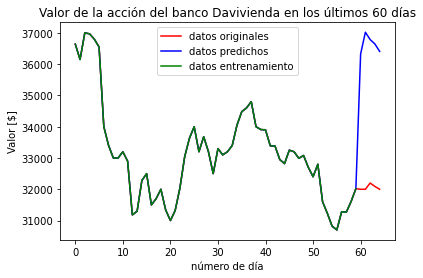

In [84]:
plt.plot(range(len(data+predicted)), df.iloc[:65,0], label = 'datos originales', color = 'r')
plt.plot(range(len(data+predicted)), data+predicted, label = 'datos predichos', color = 'b')
plt.plot(range(len(data)), data, label = 'datos entrenamiento', color = 'g')

plt.xlabel('número de día')
plt.ylabel('Valor [$]')
plt.title('Valor de la acción del banco Davivienda en los últimos 60 días')
plt.legend()
plt.show()

De la figura anterior, se evidnecia una gran diferente entra la información de la función de color azul, y la roja, la razón muy posiblemente sea por la cantidad de datos de entrada o bien por colocar un valor bajo de la población, otra posible causa puede ser poque el modelo que encontró el programa está desfasado con respecto al modelo de entrenamiento, los cual se puede observar en la siguiente figura: 
![resultado mepx](resultado_mepx.png)

## Punto 2
Estudie en https://gplearn.readthedocs.io/en/stable/intro.html#classification, la librería
gplearn de Python; y utilícela para solucionar el ejercicio anterior u otro problema que le
interese.

In [219]:
%matplotlib inline
from gplearn.genetic import SymbolicRegressor
import matplotlib.pyplot as plt
import numpy as np
import graphviz 
import os
import control.matlab as mt  # MATLAB-like functions

### ***Ejercicio***
Para este caso se propone usar programación genética, para que a partir de la salida de un sistema de segundo orden subamortiguado, se obtenga el respectivo calor del coeficiente de amortiguamiento, ya que este es uno de los parámetros claves para caracterizar un sistema,  donde el sistema en cuestión en el dominio de laplace se puede ver como:

$Y(s) = \frac{\omega_n^2}{s^2+2\xi \omega_n s + \omega_n^2} $, donde $\omega_n$ y $\xi$ son la frecuencia natural y el coeficiente de amortiguamiento, respectivamente.

Para un sistema subamortiguado la  respuesta en el tiempo es:

$L^{-1}[Y(s)] = y(t) = 1 - e^{-\xi \omega_n t}\left( \cos(\omega_d t)+ \frac{\xi}{\sqrt{1-\xi^2}} \sin(\omega_d t)\right)$, donde $\omega_d = \omega_n \sqrt{1-\xi}$


Para aproximarse a la solución del problema, primero se generan 10 valores aleatorios para el coeficiente de amortiguamiento, usando *control.matlab* que es una libería que aporta funciones similares a las de Matlab para sistemas y control, donde para cada valor aleatorio obtenido, se genera la respuesta al paso unitario, dicha salida se guarda como muestra al valor del coeficiente de amortiguamiento, y finalmente se alimenta con esta información el algoritmo genético, para finalmente evaluar cada una de estas entradas.

In [125]:
def get_tf_sys(wn, z):
    return mt.tf([wn**2], [1, 2*z*wn, wn**2])

In [10]:
def get_array_from_center(value, step, length):
    left = list(np.arange(value-step*length/2, value, step))
    right = list(np.arange(value, value+step*length/2, step))
    return left[:-1]+[value]+ right[1:]

In [12]:
def mapear(val, in_range, out_range):
    P1 = {'x':in_range[0], 'y':out_range[0]}
    P2 = {'x':in_range[1], 'y':out_range[1]}
    m = (P2['y']-P1['y'])/(P2['x']-P1['x'])
    b = P2['y']-m*P2['x']
    return m*val+b

In [242]:
# se generan aleatoriamente 10 valores del coeficiente de amortiguamiento
# eta = [np.random.random() for _ in range(10)]
xi = [0.17047905322990864,
 0.4135695649425357,
 0.49883060476037744,
 0.03839424354054377,
 0.26206420043884715,
 0.8249552109728093,
 0.8519313189797898,
 0.19256233171224724,
 0.7717995430706255,
 0.3354907215324039]

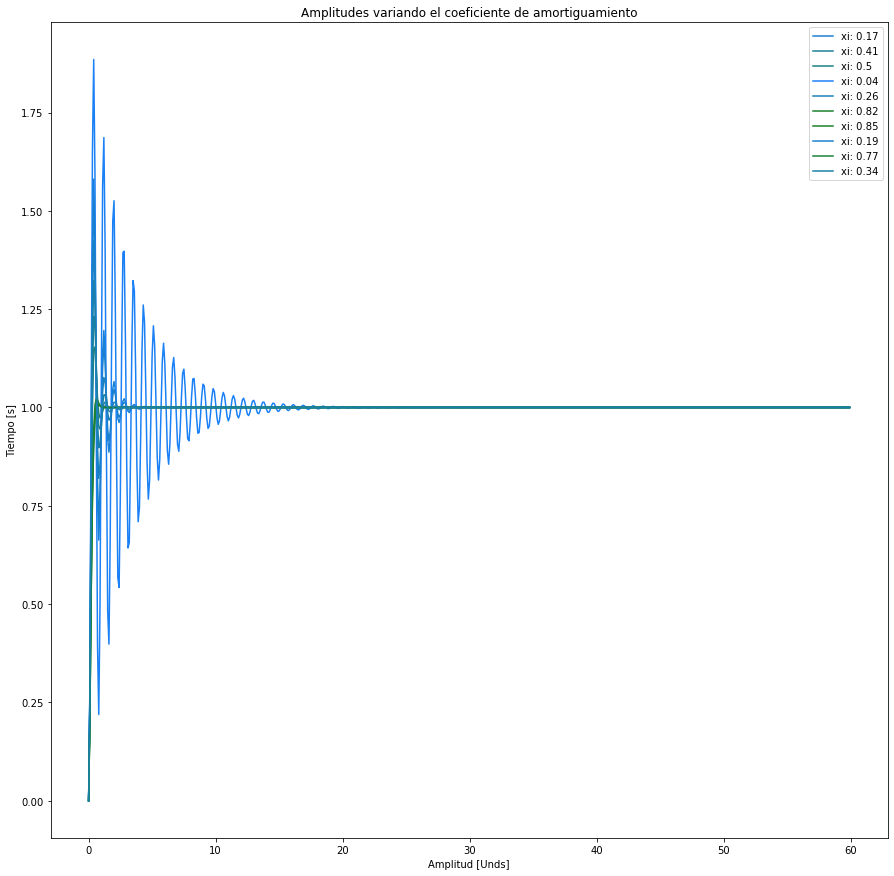

In [243]:
plt.figure(20, figsize = (15,15))
entrada = []
salida = []
tiempo = np.arange(0,60,0.1)
for e in xi:
    y, _ = mt.step(get_tf_sys(8, e), tiempo)
    entrada.append(y)
    salida.append(e)
    plt.plot(tiempo, y, label = f'xi: {round(e, 2)}', color = [0.1,0.5,1-e])
plt.legend()
plt.title('Amplitudes variando el coeficiente de amortiguamiento')
plt.ylabel('Tiempo [s]')
plt.xlabel('Amplitud [Unds]')
plt.show()

In [244]:
funciones = ['add', 'sub', 'mul','sin','cos','log','inv']

In [245]:
st_second_order = SymbolicRegressor(population_size=5000,
                           generations=20, stopping_criteria=0.001,
                           p_crossover=0.7, p_subtree_mutation=0.001,
                           p_hoist_mutation=0.05, p_point_mutation=0.1,
                           max_samples=0.9, verbose=1,
                           parsimony_coefficient='auto', random_state=0,
                           function_set = funciones, n_jobs = 3)
st_second_order.fit(entrada,salida)

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0     7.95          1.08371        2        0.0660176        0.0770817     52.24s
   1     2.08         0.333292        2        0.0604795         0.126925      1.24m
   2     2.23         0.301329        2        0.0604795         0.126925      1.48m
   3     2.01         0.158024        2        0.0604795         0.126925      1.29m
   4     2.23         0.143428        4        0.0601358         0.126925      1.18m
   5     3.51          0.13023        6        0.0598059         0.126925      1.10m
   6     5.30          0.12301        6        0.0546989         0.126951      1.19m
   7     8.79         0.127651       12        0.0588937         0.126925      1.06m
   8     8.42         0.123463       18        0.0583458         0.126925  

SymbolicRegressor(function_set=['add', 'sub', 'mul', 'sin', 'cos', 'log',
                                'inv'],
                  max_samples=0.9, n_jobs=3, p_crossover=0.7,
                  p_hoist_mutation=0.05, p_point_mutation=0.1,
                  p_subtree_mutation=0.001, parsimony_coefficient='auto',
                  population_size=5000, random_state=0, stopping_criteria=0.001,
                  verbose=1)

In [246]:
# se imprime la expresión final obtenida
print(st_second_order._program)

mul(X80, mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X372, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X341, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80

programa = mul(X80, mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X372, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X341, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(mul(X341, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X341, mul(mul(X80, mul(mul(X80, mul(X80, mul(X341, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(mul(X80, mul(mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X341, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X341, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X341, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X341, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(mul(mul(mul(X80, mul(X80, mul(mul(X341, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X341, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X278, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(mul(X80, mul(mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X341, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X278, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X341, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X341, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(mul(X341, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X341, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X341, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X341, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X341, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(mul(mul(mul(mul(mul(mul(X80, mul(mul(mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X341, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X341, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(mul(X80, mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(mul(X80, mul(X80, mul(X341, mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(X80, mul(X80, mul(mul(mul(X80, mul(X341, mul(X80, mul(X80, mul(mul(mul(X80, mul(mul(X80, mul(X80, mul(X80, mul(mul(X80, mul(mul(mul(mul(mul(X80, mul(X80, mul(X80, cos(X3)))), X278), X278), X278), X278)), X278)))), X278)), X278), X278))))), X278), X278))), X278)), X278))))))), X278)), X278)))), X278), X278)))), X278))), X278), X278), X278)), X278)))), X278)), X278), X278))), X278), X278)))), X278), X278))), X278))))), X278)), X278), X278), X278)))), X278)))), X278)))), X278)))))), X278))), X278), X278))))), X278))), X278))), X278), X278)))), X278))), X278), X278))), X278), X278), X278)))), X278))))))), X278), X278)), X278), X278)))), X278), X278)), X278)))), X278))), X278)), X278), X278)), X278))))))), X278))), X278))))), X278)), X278), X278)), X278))))))), X278))), X278)), X278)), X278), X278))))), X278), X278))), X278))), X278))), X278), X278), X278))))), X278)), X278))))), X278), X278))), X278)), X278), X278), X278), X278))))), X278)), X278))), X278))))))), X278)))), X278), X278), X278), X278)), X278), X278), X278), X278), X278), X278), X278)), X278)), X278), X278))))), X278), X278))), X278))))), X278))))), X278)), X278)), X278)))), X278))), X278)), X278), X278)))))), X278)))), X278)))), X278))), X278), X278))))), X278), X278)))), X278))))), X278), X278), X278))))), X278))), X278)), X278))), X278)), X278)))), X278))), X278)), X278)), X278), X278))), X278)), X278)), X278)), X278), X278)), X278))))), X278))), X278), X278)), X278)))), X278), X278))), X278))))), X278))))))), X278))), X278), X278)), X278)), X278))), X278))), X278), X278), X278)))))), X278)))), X278)), X278)), X278)))), X278), X278)), X278)), X278)), X278), X278))))), X278), X278))), X278)), X278)))))))), X278))), X278)), X278))), X278))), X278))), X278)))), X278))), X278)), X278))), X278))), X278)), X278)), X278)), X278)))))), X278), X278))))), X278), X278)), X278)))), X278)), X278), X278))), X278)), X278)))), X278)), X278)))))))))), X278), X278), X278))))), X278)), X278)), X278), X278), X278)))), X278))), X278)))), X278), X278), X278))))), X278)), X278))), X278)), X278)))))), X278), X278))), X278)), X278)), X278), X278))), X278)))))), X278))))), X278), X278), X278))))), X278))), X278)), X278))), X278)), X278)))), X278))), X278)), X278)), X278), X278))), X278)), X278)), X278)), X278), X278)), X278))))), X278))), X278), X278)), X278)))), X278), X278))), X278))))), X278))))))), X278))), X278), X278)))), X278), X278))), X278)))), X278))), X278)))))))), X278)), X278))))), X278)), X278))), X278))), X278)), X278))), X278)), X278)), X278), X278))))), X278), X278))), X278)), X278)), X278)), X278), X278), X278))))), X278), X278)), X278), X278))))), X278)), X278)), X278)), X278))), X278), X278))), X278), X278), X278)), X278)), X278), X278), X278))))), X278)), X278))))))))))))), X278)), X278))))))), X278))))))))))), X278))), X278)), X278)), X278))))))), X278), X278)))), X278))), X278))), X278), X278))))), X278)), X278))), X278), X278)))))), X278))), X278), X278))))), X278)), X278)), X278))), X278), X278)), X278)))))), X278)), X278))), X278)), X278)), X278))), X278))), X278), X278)))))), X278), X278)), X278))))), X278))), X278)), X278)), X278))))), X278)), X278))), X278), X278))), X278)), X278))))))))), X278), X278)), X278), X278)), X278)))), X278))), X278)), X278)), X278), X278))), X278)), X278)), X278)), X278), X278), X278)), X278)), X278))))))), X278)), X278))))), X278))), X278), X278), X278))), X278)), X278)), X278), X278))), X278))))))), X278), X278), X278)), X278)), X278)))), X278)), X278))))))))))), X278)))))), X278))))), X278), X278), X278))))), X278))), X278)), X278))), X278)), X278))))))), X278)), X278))), X278)), X278))), X278))), X278), X278), X278)))), X278)))), X278), X278))), X278)), X278), X278))), X278)))))))), X278), X278)), X278))), X278)))), X278)), X278)), X278), X278))))), X278), X278))), X278)))), X278), X278), X278), X278), X278), X278))), X278)))))))), X278)))))), X278)), X278)), X278))))), X278), X278)), X278), X278)), X278))))), X278))), X278))), X278)))))))))), X278)), X278)))), X278))))))), X278), X278))), X278), X278))), X278), X278)))), X278)))))))))), X278), X278), X278), X278)), X278), X278), X278)), X278))))))))), X278)))))))), X278)), X278), X278), X278)))))))), X278)), X278))), X278))), X278), X278))))), X278), X278)))))))))), X278), X278), X278)))))))), X278)))), X278), X278))))), X278), X278))), X278)))), X278), X278))), X278), X278), X278))))), X278)), X278))))), X278), X278)))))), X278)), X278))))))), X278))), X278)), X278)), X278)))), X278)))), X278))), X278), X278), X278))), X278)), X278)), X278), X278))), X278)), X278))), X278), X278), X278))), X278)), X278)), X278))), X278), X278), X278), X278)), X278), X278)))), X278))), X278)))), X278)))))), X278)), X278), X278))))), X278), X278))), X278)), X278)), X278))))), X278), X278), X278))))), X278))), X278)), X278))), X278)), X278))))))), X278)), X278))), X278)), X278))), X278))), X278), X278), X278)))), X278)))), X278), X278))), X278)), X278), X278))), X278)))))))), X278), X278)), X278))), X278)))), X278)), X278)), X278), X278))))), X278), X278))), X278)))), X278), X278), X278), X278), X278), X278))), X278)))))))), X278)))))), X278)), X278)), X278))))), X278), X278)), X278), X278)), X278))))), X278))), X278), X278)), X278)), X278)), X278), X278))))), X278)), X278)), X278), X278)))), X278), X278)))), X278)), X278), X278))), X278))))))), X278)))), X278), X278))))))), X278)), X278))), X278)), X278), X278)))))))), X278)))))))))))), X278)), X278))), X278))), X278), X278), X278)))), X278))), X278))), X278), X278))))), X278), X278)), X278))), X278))), X278), X278), X278))), X278)), X278)), X278), X278))), X278)))))))), X278)), X278))), X278), X278)))))), X278))), X223), X278))))), X278))), X278), X278))), X278))))), X278))), X278), X278))), X278))))), X278))), X278)), X278)), X278)))), X278)))), X278)), X278))), X278)))), X278), X278))))), X278)), X278)))))), X278), X278), X278), X278))))))), X278), X278))), X278)), X278)))))))), X278))), X278)), X278))), X278))), X278))), X278))), X278))), X278), X278))), X278)), X278), X278))), X278)))))))), X278), X278)), X278))), X278)))), X278), X278), X278), X278)), X278)), X278), X278), X278)))), X278)))), X278)))), X278)))))), X278))), X278), X278))))), X278), X278))), X278), X278), X278), X278), X278)))), X278)), X278), X278), X278))))), X278)), X278))))))))))))), X278), X278))), X278)), X278))))), X278)), X278))))), X278)), X278))), X278)))))), X278), X278), X278))), X278))))))), X278), X278)), X278))))), X278))), X278)), X278)), X278))))), X278)), X278))), X278), X278)), X278), X278))), X278))), X278))), X278))))), X278), X278))))), X278))), X278))))), X278)), X278)))))))))), X278))), X278), X278)), X278)), X278))))))), X278)))), X278), X278), X278), X278))), X278), X278))), X278)))), X278), X278)))), X278))), X278), X278))), X278), X278), X278)))), X278))))))), X278), X278)), X278), X278)))), X278), X278)), X278))), X278)), X278), X278), X278)))), X278)))), X278))), X278)), X278))), X278)), X278)), X278), X278))))), X278), X278))), X278)), X278)), X278)), X278), X278), X278))))), X278), X278)), X278), X278))))), X278)), X278)), X278)), X278))), X278), X278))), X278), X278), X278)), X278)))))))), X278)))))), X278))))))))), X278))))), X278), X278))), X278)), X278), X278), X278)))), X278)))), X278))), X278)), X278))), X278)), X278)), X278), X278))))), X278), X278))), X278)))), X278)))), X278))))))), X278), X278)))), X278)))))), X278)), X278))), X278))))), X278)))))), X278)), X278))))))))), X278))), X278)))), X278), X278)))), X278), X278), X278))))), X278)))), X278)))))))), X278))), X278)))))), X278))))), X278))), X278)))))))), X278))), X278))))), X278), X278))), X278), X278)))), X278), X278))), X278))), X278)))), X278)))), X278))), X278), X278), X278))))), X278)), X278))))), X278), X278)))))), X278)), X278))))))), X278)))), X278))))), X278)), X278)), X278)), X278)))))))), X278)))

In [247]:
out = [st_second_order.predict([vector])[0] for ix, vector in enumerate(entrada)]

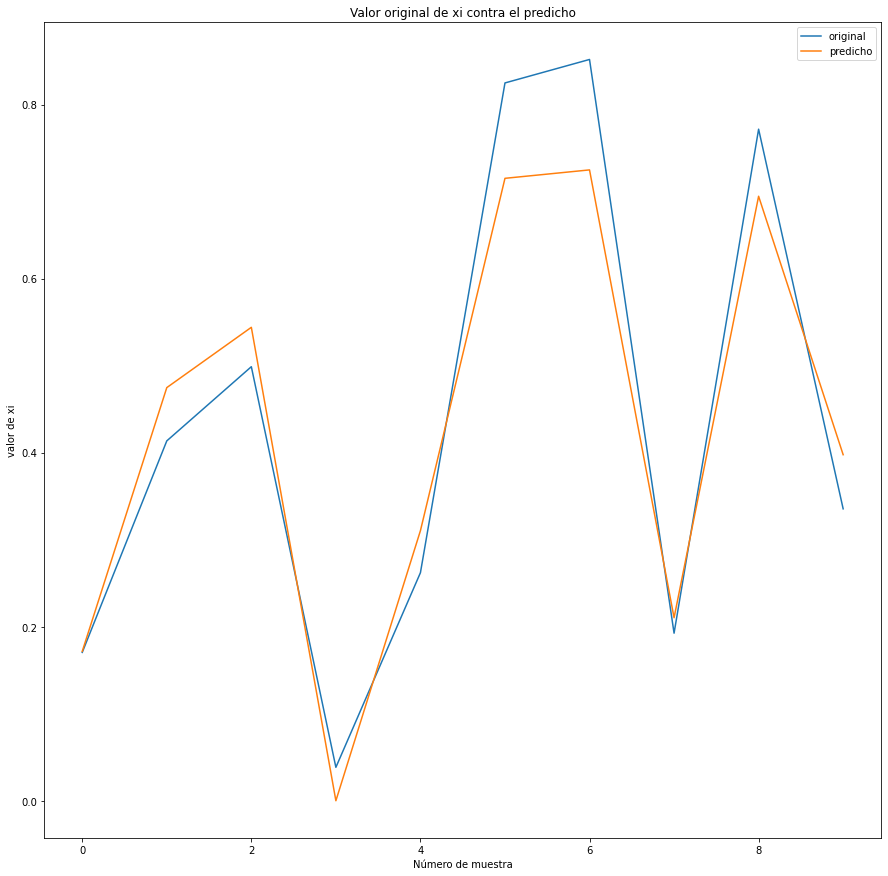

<Figure size 432x288 with 0 Axes>

In [252]:
plt.figure(12,figsize =(15,15))
plt.plot(xi, label = 'original')
plt.plot(out, label = 'predicho')
plt.legend()
plt.xlabel('Número de muestra')
plt.ylabel('valor de xi')
plt.title('Valor original de xi contra el predicho')
plt.show()
#plt.savefig('PG_identificacion_sistema.png')

De la anterior figura, se puede ver que se tiene una aproximación en una forma similar, para obtener el valor del coeficiente de amortiguamiento, por otro lado, como el resultado del programa, se basa en multiplicaciones, en ves de aplicar funciones trigonométricas, muy posiblemente sea la causa de que el resultado sea un poco inexacto

## Punto 3

Suponga que desea utilizar Programación Genética para encontrar el circuito lógico de un
codificador de 7 segmentos, a partir de un byte con un número decimal que debe
mostrarlo en un LED de 7 segmentos. Describa el conjunto de terminales, el conjunto de
funciones y la función de aptitud. Use una librería de Python.

In [1]:
import numpy as np
import pandas as pd
import operator
import math
import random
import numpy
import cv2
from deap import algorithms, base, creator, tools, gp

In [2]:
df_codificador = pd.read_excel("Datos tabla verdad codificador 7 segmentos.xlsx")

In [3]:
df_codificador = df_codificador.dropna(axis = 1)

In [4]:
df_codificador.columns = df_codificador.iloc[0,:]

In [5]:
df_codificador = df_codificador.drop(0)

In [170]:
inputs  = df_codificador.iloc[:,0:4].to_numpy()
outputs = df_codificador.iloc[:,4:-1].to_numpy()

En este caso, se usa la librería DEAP (Distributed Evolutionary Algorithms in Python), la cual cuenta con un módulo para solucionar problemas relacionados con algoritmos genéticos como también casos de programación genética, dentro de sus características, se tiene que desde el usuario se puede definir las funciones para usar dentro de los árboles, que en comparación con Pygad y gplearn, no se podría, ya que traen funciones por defecto.

A continuación se presenta la tabla de verdad, donde $x1, x2, x3, x4$, representa el valor decimal de 0 a 9, y los valores de $y1,y2,..., y9$, las salidas al led 7 segmentos, la tabla es la siguiente:

In [407]:
df_codificador

,x1,x2,x3,x4,y1,y2,y3,y4,y5,y6,y7,Decimal
1,0,0,0,0,1,1,1,1,1,1,0,0
2,0,0,0,1,0,1,1,0,0,0,0,1
3,0,0,1,0,1,1,0,1,1,0,1,2
4,0,0,1,1,1,1,1,1,0,0,1,3
5,0,1,0,0,0,1,1,0,0,1,1,4
6,0,1,0,1,1,0,1,1,0,1,1,5
7,0,1,1,0,1,0,1,1,1,1,1,6
8,0,1,1,1,1,1,1,0,0,0,0,7
9,1,0,0,0,1,1,1,1,1,1,1,8
10,1,0,0,1,1,1,1,0,0,1,1,9


De lo anterior,  se tiene que:

- **Conjunto de terminales:** $x1,x2,x3,x4$
- **Conjunto de funciones:** __and__, __not__, __or__, __xor__ (que son las compuertas básicas)
- **La función de aptitud:** $apt(x,y) = \frac{1}{0.1+ \sum_{k=0}^n (not(xor(x,y))}$, donde $k$ es representa el k-ésimo valor para la entrada $x$ y $y$

In [380]:
def pintar_num(num,vals,img_size=[80,50],space=2,line_width=2,line_large=[25,20]):
    # función que permite pintar el display 7 segmentos
    rojo = (255,0,0)
    verde = (0,255,0)
    azul = (0,0,255)
    gris = (220,220,220)
    
    img = 255*np.ones((img_size[0],img_size[1],3), np.uint8)
    entrada = [bool(int(i)) for i in np.binary_repr(num,4)]
    entrada = entrada[::-1]
    
    
    num_size = [2*line_large[0]+3*line_width+4*space,line_large[1]+2*line_width+2*space]
    border2num = [(img_size[0]-num_size[0])/2,(img_size[1]-num_size[1])/2]
    
    a = [border2num[1]+line_width+space,border2num[0]+line_width/2,
         border2num[1]+line_width+space+line_large[1],border2num[0]+line_width/2]
    b = [img_size[1]-(border2num[1]+line_width/2),border2num[0]+line_width+space,
         img_size[1]-(border2num[1]+line_width/2),border2num[0]+line_width+space+line_large[0]]
    c = [img_size[1]-(border2num[1]+line_width/2),border2num[0]+2*line_width+3*space+line_large[0],
         img_size[1]-(border2num[1]+line_width/2),border2num[0]+2*line_width+3*space+2*line_large[0]]
    d = [border2num[1]+line_width+space,img_size[0]-(border2num[0]+line_width/2),
         border2num[1]+line_width+space+line_large[1],img_size[0]-(border2num[0]+line_width/2)]
    e = [border2num[1]+line_width/2,border2num[0]+2*line_width+3*space+line_large[0],
         border2num[1]+line_width/2,border2num[0]+2*line_width+3*space+2*line_large[0]]
    f = [border2num[1]+line_width/2,border2num[0]+line_width+space,
         border2num[1]+line_width/2,border2num[0]+line_width+space+line_large[0]]
    g = [border2num[1]+line_width+space,border2num[0]+3*line_width/2+2*space+line_large[0],
         border2num[1]+line_width+space+line_large[1],border2num[0]+3*line_width/2+2*space+line_large[0]]
    
    Color = verde
    coor = [a,b,c,d,e,f,g]
    coor = list(map(lambda x: list(map(int,x)), coor))
    for i, coor_ in enumerate(coor):
        if vals[i][0]: # si está activo valor estimado
            Color = rojo
        elif vals[i][1]: # si está activo valor deseado
            Color = verde
        else: # en otro caso se mantiene apagado
            Color = gris
            
        img = cv2.line(img,(coor_[0],coor_[1]),(coor_[2],coor_[3]),Color,line_width)

    return img

In [398]:
class find_circuit:
    # clase que permite la encapsulación del programa genético para busca el ciruito
    # de acuerdo  las entradas x_i y su respectiva salida y_i
    def __init__(self, inputs, outputs, ix_output=0):
        # inputs: vector de la forma [[x1,x2,x3,x4] ...[x1n,x2n,x3n,x4n]]
        # outputs: vector de la forma [[y1,y2,y3,y4] ...[y1n,y2n,y3n,y4n]]
        # ix_output: índice para definir una salida
        
        self.index = ix_output;
        # se crean las primitivas
        self.primitive_set = gp.PrimitiveSetTyped("main", [bool, bool, bool, bool], bool, "x")
        self.primitive_set.addPrimitive(operator.and_, [bool, bool], bool)
        self.primitive_set.addPrimitive(operator.not_, [bool], bool)
        self.primitive_set.addPrimitive(operator.or_,  [bool, bool], bool)
        self.primitive_set.addPrimitive(operator.xor,  [bool, bool], bool)
        
        # se establece el conjunto de herramientas (operadores y algoritmos)
        self.toolbox = base.Toolbox()
        self.toolbox.register("expr", gp.genHalfAndHalf, pset=pset, min_=4, max_=5)
        self.toolbox.register("individual", tools.initIterate, creator.Individual, self.toolbox.expr)
        self.toolbox.register("population", tools.initRepeat, list, self.toolbox.individual)
        self.toolbox.register("compile", gp.compile, pset=pset)
        
        # se crean los tipos de individuos
        creator.create("FitnessMax", base.Fitness, weights=(1.0,))
        creator.create("Individual", gp.PrimitiveTree, fitness=creator.FitnessMax)
        
        # función de aptitud
        def evalCircuit(individual):
            func = self.toolbox.compile(expr=individual)
            return 1/(0.1+sum(func(*in_) == out for in_, out in zip(inputs, outputs[:,self.index]))),
        
        # se definen procesos de programación genética, selección, mutación...
        self.toolbox.register("evaluate", evalCircuit)
        self.toolbox.register("select", tools.selTournament, tournsize=7)
        self.toolbox.register("mate", gp.cxOnePoint)
        self.toolbox.register("expr_mut", gp.genGrow, min_=0, max_=2)
        self.toolbox.register("mutate", gp.mutUniform, expr=self.toolbox.expr_mut, pset=pset)
        
    def get_circuit(self):
        # pop: population (población)
        # stats: statistics (estadísticas)
        # hof: hall of fame (salón de la fama o n mejores individuos)
        self.pop = self.toolbox.population(n=40)
        self.hof = tools.HallOfFame(1)
        self.stats = tools.Statistics(lambda ind: ind.fitness.values)
        self.stats.register("avg", numpy.mean)
        self.stats.register("std", numpy.std)
        self.stats.register("min", numpy.min)
        self.stats.register("max", numpy.max)

        algorithms.eaSimple(self.pop, self.toolbox, 0.8, 0.1, 40, self.stats, halloffame = self.hof,verbose=False)

        return self.pop, self.stats, self.hof

In [399]:
dict_7_segment_ciruit = {}
for index in range(0,7):
    print('CIRCUITO OBTENIDO PARA Y'+str(index))
    obj_circuit_finder = find_circuit(inputs, outputs, index)
    pop, stats, hof = obj_circuit_finder.get_circuit()
    dict_7_segment_ciruit['y'+str(index)] = {
        'poblacion':pop,
        'stadisticas':stats,
        'circuito':hof[0],
        'fun_circuito': toolbox.compile(expr=hof[0])
    }

************** CIRCUITO PARA Y0
************** CIRCUITO PARA Y1
************** CIRCUITO PARA Y2
************** CIRCUITO PARA Y3
************** CIRCUITO PARA Y4
************** CIRCUITO PARA Y5
************** CIRCUITO PARA Y6


In [400]:
for k,v in dict_7_segment_ciruit.items():
    print('\n'+k+' => '+str(v['circuito']))


y0 => and_(and_(x0, x0), or_(and_(not_(and_(xor(xor(x0, x2), not_(x1)), and_(and_(x3, x0), and_(x0, x0)))), xor(and_(xor(xor(x0, x2), not_(x1)), and_(and_(x3, x0), and_(x0, x0))), x1)), or_(xor(x0, or_(x0, x3)), not_(not_(xor(xor(xor(x0, x2), not_(x1)), not_(x0)))))))

y1 => or_(xor(and_(x2, xor(x0, x2)), xor(xor(x2, x3), x3)), or_(and_(and_(xor(x2, x1), or_(x1, x1)), x2), xor(and_(x1, xor(and_(xor(x2, x0), xor(x0, x2)), x3)), and_(or_(and_(and_(xor(x2, x1), or_(x1, x1)), x2), xor(and_(x1, xor(and_(xor(x2, x0), xor(x0, x2)), x3)), and_(and_(xor(x2, x1), or_(x1, x1)), x0))), x0))))

y2 => and_(or_(not_(or_(x2, x0)), or_(or_(x2, x0), x2)), and_(and_(x0, or_(x1, and_(x2, x0))), or_(and_(x2, x0), x0)))

y3 => xor(and_(and_(or_(and_(x2, x0), x3), not_(or_(not_(x1), x2))), and_(not_(not_(or_(x1, x2))), x0)), not_(xor(or_(and_(x2, x0), x3), or_(not_(x1), x2))))

y4 => or_(or_(xor(xor(x3, and_(or_(and_(x2, xor(x0, xor(xor(x3, x3), or_(x3, x1)))), and_(or_(and_(x2, xor(x2, x3)), not_(and_(x0, 

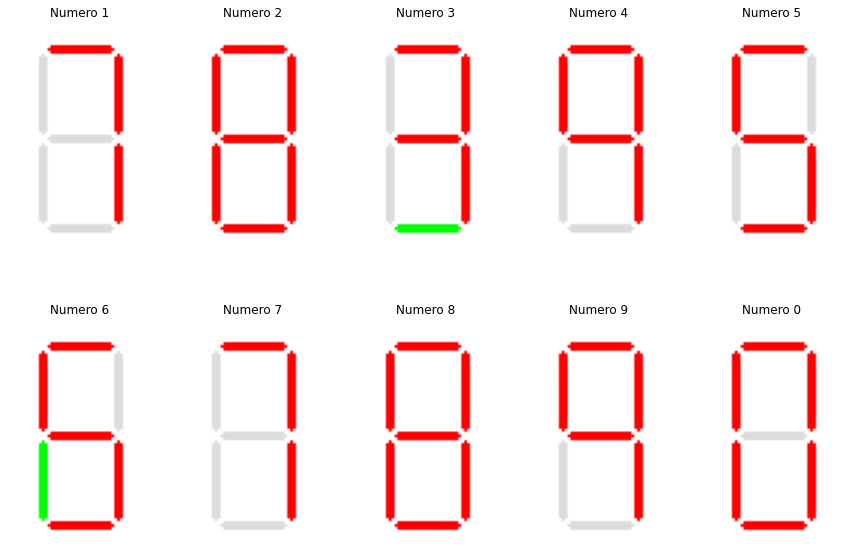

In [401]:
fig = plt.figure(figsize=(15,10))
for ix, in_vals in enumerate(inputs):
    estimated = [1-v['fun_circuito'](*in_vals) for k,v in dict_7_segment_ciruit.items()]
    valores = list(zip(estimated, outputs[ix]))
    if ix < 10:
        plt.subplot(2,5,(ix-1)%10+1), plt.imshow(pintar_num(ix,valores)), plt.title('Numero '+str(ix))
        plt.axis('off')
# Rojo: obtenido con circuito
# Verde: respuesta deseada

## Punto 4
Suponga que tiene un robot que le entrega galletas al grupo de ingenieros de diseño de
robots. Programe por PG el recorrido del robot, teniendo en cuenta que cada vez que un
ingeniero recibe una galleta gana puntos. Los ingenieros están distribuidos en una sala
cuadrada. Defina, conjunto de terminales, conjunto de funciones y función de aptitud.

Terminales: punto x,y de cada ingeniero en la sala cuadrada

Funciones: moverse a la derecha, izquierda, superior e inferior

Función de aptitud: $f(x_0,x_i) = \frac{1}{0.1 + norm(x_i-x_o)}$, donde $x_0$ es la posición del robot y $x_i$ es la posición del ingeniero, básicamente la función de aptitud es el árbol que tiene un punto final más cercano al punto donde está el ingeniero

In [887]:
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

In [888]:
def izquierda(x,y):
    return x-1,y

def derecha(x,y):
    return x+1,y

def arriba(x,y):
    return x,y-1

def abajo(x,y):
    return x,y+1

In [889]:
class Node:
    def __init__(self, info, index = 0):
        self.left_node = None
        self.right_node = None
        self.data = info
        
class Tree:
    def __init__(self, dato, deep, functions, terminals):
        self.root_node = Node(dato)
        self.path = [] # lista donde se guardan las operaciones
        for _ in range(deep):
            ix_rand_fun = np.random.randint(1,len(functions))
            self.add_function(functions[ix_rand_fun])
        for terminal in terminals:
            self.add_function(terminal)
    
    def add_function(self, fun, is_firts = True, nodo=None):
        if is_firts:
            self.add_function(fun,False,self.root_node)
        else:
            if nodo.left_node:
                self.add_function(fun,False,nodo.left_node)
            else:
                #print("Se agregó corerctamente: ", fun)
                nodo.left_node = Node(fun)
    
    def inorder_print(self, is_firts = True, nodo = None):
        if is_firts:
            self.inorder_print(False, self.root_node)
        else:
            if nodo.left_node:
                self.inorder_print(False, nodo.left_node)
                print(nodo.data)
            else:
                if nodo.right_node:
                    self.inorder_print(False, nodo.left_node)
                else:
                    print(nodo.data)
    def get_path(self, is_firts = True, nodo = None):
        if is_firts:
            self.path = []
            self.get_path(False, self.root_node)
        else:
            if nodo.left_node:
                self.get_path(False, nodo.left_node)
                self.path.append(nodo.data)
            else:
                if nodo.right_node:
                    self.get_path(False, nodo.left_node)
                else:
                    self.path.append(nodo.data)
                    
        return self.path
    
    def get_final_point(self):
        # distancia entre el punto inicial y final
        path = self.get_path()
        final_point = None
        for data_node in path:
            if type(data_node) == str:
                continue
            if final_point:
                final_point = data_node(*final_point)
            else:
                final_point = data_node # el punto inicial es el terminal
        return np.array(final_point)
        
    
    def get_distance(self):
        return len(self.get_path())-2
    
    def get_displacement(self):
        path = self.get_path()
        ini_point = np.array(path[0])
        final_point = self.get_final_point()
        return np.linalg.norm(final_point - ini_point)
    
    def get_node(self, index, is_first=True, nodo = None, ix = 0):
        if is_first:
            return self.get_node(index,False,self.root_node,ix+1)
        else:
            if nodo.left_node:
                if index == ix:
                    self.nodo_found = nodo
                    return self.nodo_found
                else:
                    return self.get_node(index,False,nodo.left_node,ix+1)
            else:
                print('nodo fuera de alcance')
                    
    def get_deep(self):
        return len(self.get_path())

In [890]:
class gpRobot:
    def __init__(self,num_pob, max_deep, pos_ini, num_gen, fun_set, terminal):
        # num_pob: cantidad de poblaciones
        # max_deep: máxima profundidad de los árboles en la población inicial
        # pos_ini: posición inicial del robot
        self.population_ini = [Tree('pob'+str(npob),np.random.randint(max_deep), fun_set,[terminal]) for npob in range(num_pob)]
        self.robot_pos = np.array(pos_ini)
        self.generations = []
        self.next_generation = []
        self.generations.append(self.population_ini)
        self.num_gen = num_gen
        self.fun_set = fun_set
        
    def aptitud(self, individual):
        error = abs(np.linalg.norm(self.robot_pos - individual.get_final_point()))
        distance = individual.get_distance() # TODO: penalizar los que tienen distancias largas
        return 1 / (0.1 + error)
    
    def get_aptitudes(self):
        return np.array([self.aptitud(member) for member in self.population_ini])
    
    def select(self):
        aptitudes = self.get_aptitudes()
        best_members = aptitudes[aptitudes > aptitudes.mean()]
        chosen = []
        
        while len(chosen) < len(self.population_ini):
            ix_rand_select = np.random.randint(best_members.shape[0])
            chosen.append(self.population_ini[ix_rand_select])
        
        return chosen
    
    def cross(self):
        # se realiza un cruzamiento simple, donde se toman parejas de árboles y se cruzan entre sí
        # en una profundidad aleatoria
        for ix_individuo, parent1 in enumerate(self.population_ini):
            if ix_individuo % 2 == 1: # si es impar, pase a la siguiente
                continue
            parent2 = self.population_ini[ix_individuo+1]
            ix_cross_p1 = np.random.randint(1,parent1.get_deep())
            ix_cross_p2 = np.random.randint(1,parent2.get_deep())
            #print(ix_individuo, ix_cross_p1, ix_cross_p2, end=' \t => \t')
            # se realizan copias de los subárboles para evitar que 
            # las variables terminen apuntando al mismo lado
            sub_tree1 = copy(parent1.get_node(ix_cross_p1))
            sub_tree2 = copy(parent2.get_node(ix_cross_p2))
            parent1.get_node(ix_cross_p1).left_node = sub_tree2
            parent2.get_node(ix_cross_p2).left_node = sub_tree1
            #print(parent1.get_deep(), parent2.get_deep())
            
    def mutate(self, pop_mut, fun_set):
        # La mutación se realiza de forma simple, donde se seleccionan num_mut cantidad
        # de árboles a mutar, y dentro de tal árbol se selecciona un nodo a mutar
        num_mut = 1/pop_mut
        for _ in range(int(num_mut)):
            ix_tree_to_mutate = np.random.randint(len(self.population_ini))
            deep_tree = self.population_ini[ix_tree_to_mutate].get_deep()
            ix_nodo = np.random.randint(1,deep_tree)
            ix_fun = np.random.randint(len(fun_set))
            self.population_ini[ix_tree_to_mutate].get_node(ix_nodo).data = fun_set[ix_fun]
    
    def get_best_path(self):
        history_apt = []
        for _ in range(self.num_gen):
            self.select()
            self.cross()
            self.mutate(0.5, self.fun_set)
            self.generations.append(copy(self.population_ini))
            aptitudes = self.get_aptitudes()
            
            history_apt.append(aptitudes.max())            
            if aptitudes.max() == 10:
                print("Solución encontrada en población => \t",_)
                #fig = plt.figure(figsize=(10,10))
                #plt.plot(history_apt)
                return self.population_ini[aptitudes.argmax()]
        return None # si no se encuentra una solución en la cantidad de poblaciones dadas

In [891]:
def add_trajectory_to_room(mejor, sala):
    past_point = None
    ix = 0
    for node in mejor.get_path()[:-1]:
        if type(node) == str:
            continue
        if past_point:
            past_point = node(*past_point)
            sala[past_point[0], past_point[1]] = 4
            ix += 1
        else:
            past_point = node
    sala[POST_INI_ROBOT[0], POST_INI_ROBOT[1]] = 1
    for (x,y) in ENGINEER_LOCATION:
        sala[x,y] = 2
    return sala

In [892]:
def plot_sala(sala):
    data = sala
    # define color map 
    color_map = {
        1: np.array([255, 0, 0]), # red: robot
        2: np.array([0, 255, 0]), # green: engineer
        3: np.array([68, 194, 252]), # blue: room
        4: np.array([250, 195, 97]) # orange: trajectory
    } 
    

    # make a 3d numpy array that has a color channel dimension   
    data_3d = np.ndarray(shape=(data.shape[0], data.shape[1], 3), dtype=int)
    for i in range(0, data.shape[0]):
        for j in range(0, data.shape[1]):
            data_3d[i][j] = color_map[data[i][j]]

    # display the plot 
    fig, ax = plt.subplots(1,1,figsize=(15,15))
    ax.imshow(data_3d)

    # add numbers to the plot 
    # thanks to tmdavison answer here https://stackoverflow.com/a/40890587/7871710
    dict_info = {ix+1:k for ix,k in enumerate('R,ING, ,T'.split(','))}
    for i in range(0, data.shape[0]):
        for j in range(0, data.shape[1]):
            c = data[j,i]
            ax.text(i, j, dict_info[c], va='center', ha='center')
    ax.axis('off')

In [893]:
ROOM_HEIGHT = 25
ROOM_WIDTH = 25
POST_INI_ROBOT = (int(ROOM_WIDTH/2), int(ROOM_HEIGHT/2))
# Ubicación aleatoria de los ingenieros
ENGINEER_QUANTITY = 4
#ENGINEER_LOCATION = [(np.random.randint(ROOM_WIDTH), np.random.randint(ROOM_HEIGHT)) for _ in range(ENGINEER_QUANTITY)] 
ENGINEER_LOCATION = [(5, 18), (15, 12), (0, 10), (9, 21)]
sala = np.ones((ROOM_HEIGHT, ROOM_WIDTH))*3
sala[POST_INI_ROBOT[0], POST_INI_ROBOT[0]] = 1 # Ubicación inicial del robot reparte galletas

#ubicando los ingenieros en el mapa
for x,y in ENGINEER_LOCATION:
    sala[x][y] = 2   
# datos de entrada para algoritmo
fun_set = [izquierda, derecha, arriba, abajo]
terminals = ENGINEER_LOCATION

In [894]:
pos_robot = None
for terminal in terminals:
    if pos_robot:
        robot_obj = gpRobot(10, 10, pos_robot, 100, fun_set, terminal)
        mejor = robot_obj.get_best_path()
        while not mejor:
            robot_obj = gpRobot(10, 10, pos_robot, 100, fun_set, terminal)
            mejor = robot_obj.get_best_path()
        add_trajectory_to_room(mejor, sala)
        pos_robot = terminal
    else:
        pos_robot = POST_INI_ROBOT

Solución encontrada en población => 	 20
Solución encontrada en población => 	 87
Solución encontrada en población => 	 83


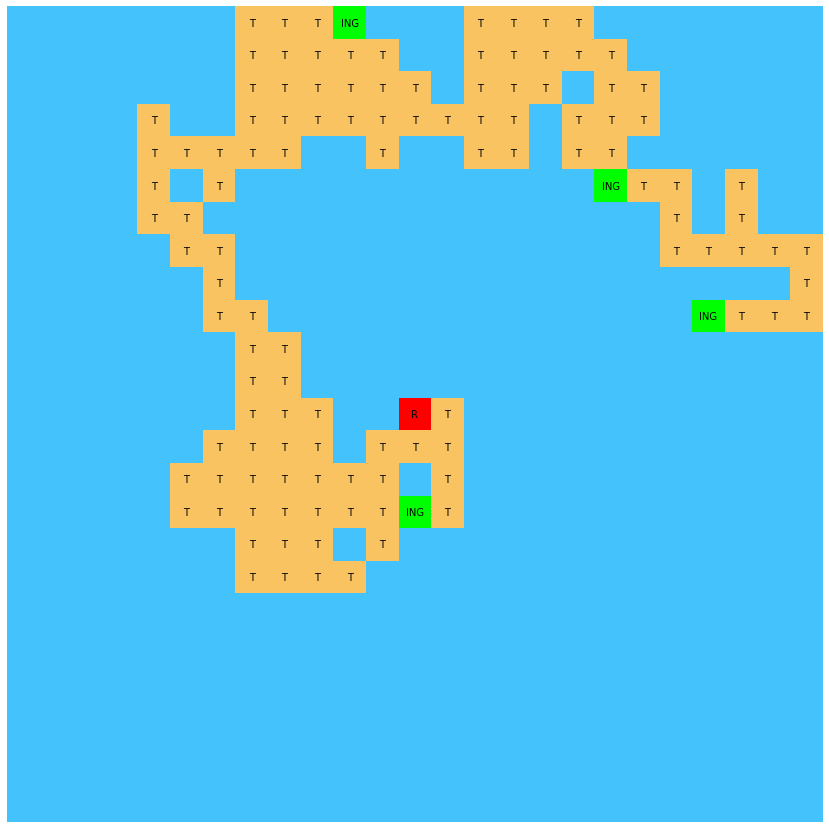

In [895]:
plot_sala(sala)

Para este caso, se coloca el robot en la mitad de la sala, y los ingenieros se ubican de forma aleatoria en la sala, donde el robot va yendo por la estación donde se ubica cada ingeniero, de acuerdo con la función de aptitud, la importancia es que llegue, sin embargo resulta importante considerar la distancia recorrida para ser minimaza, es por ello que de la figura anterior se evidencia que el robot sigue trayectorias recurrentes

## Punto 5

¿Puede utilizarse la PG para hacer Ingeniería Inversa? ¿Justifique, con todo el detalle, su
respuesta?

La respuesta directa a la pregunta en cuestión se dá en un contexto afirmativo, es decir, que al usar un análisis funcionals, usando estrategias como la caja negra, gris o bien la FAST, se pueden definir las diferentes funciones del producto, aplicando Programación Genética se puede obtener una relación directa y optimizada de dichas funciones, siguiendo un proceso similar como lo describe (Ullman, 2010) en el capítulo 7; o bien como muestran (Harman, Langdon y weimer, 2013), la programación genética se aplica para una evaluación parcial a un determinado rango finito de entradas, para optener parcialmente un programa, el cual puede ser formulado como amorfo condicionado y deslizado con respecto a todas las variables, y adicionalmente dicho programa puede ser trasplantado total o parcialmente para reusar lo generado; lo anterior con respecto a un entorno de ingeniería inversa.

## Referencias
[1] José J. Martínez P., *4. PROGRAMACION GENETICA CONCEPTOS BASICOS*, Universidad Nacional de Colombia, 2021

[2] Stephens Trevor, *Simbolic regresor*, 2022, disponible en: https://github.com/trevorstephens/gplearn/blob/master/doc/gp_examples.ipynb

[3] Ogata, Katsuhiko. Ingeniería de control moderna. Pearson Educación, 2003.

[4] Ullman, David G. "The mechanical design process: Part 1." (2010).

[5] M. Harman, W. B. Langdon and W. Weimer, "Genetic programming for Reverse Engineering," 2013 20th Working Conference on Reverse Engineering (WCRE), 2013, pp. 1-10, doi: 10.1109/WCRE.2013.6671274.

[6] Felix-Antoine Fortin, François-Michel De Rainville, Marc-André Gardner, Marc Parizeau, & Christian Gagné ( 2012 ). DEAP: Evolutionary Algorithms Made Easy . Journal of Machine Learning Research , 13 , 2171–2175 ., [online]:https://deap.readthedocs.io/en/master/tutorials/advanced/gp.html

[7] Ahmed Fawzy Gad. (2021). PyGAD: An Intuitive Genetic Algorithm Python Library, [online]:https://pygad.readthedocs.io/en/latest/

[8] Hong Qu, Ke Xing, & Alexander Takacs (2013). An improved genetic algorithm with co-evolutionary strategy for global path planning of multiple mobile robots. Neurocomputing, 120, 509-517.

